# 12.3

In [1]:
from pykrx import stock
import pandas as pd 

df1 = stock.get_market_cap_by_ticker("20100104")
df1 = df1[["종가", "시가총액"]]
df1.columns = ["시가", "시가총액"]
df1 = df1.sort_values('시가총액')
df1['group'] = pd.cut(df1.reset_index().index, bins=3, labels=['소형주', '중형주', '대형주'])
df1.tail()

,시가,시가총액,group
티커,,,
015760,34250,21973694136000,대형주
105560,59400,22949290564200,대형주
005380,119000,26212901001000,대형주
005490,612000,53358343020000,대형주
005930,809000,119165163633000,대형주


In [2]:
df2 = stock.get_market_fundamental_by_ticker("20100104")
df2 = df2[['PER', 'PBR']]
df2.head()

,PER,PBR
티커,,
004560,0.00,0.76
004565,0.00,0.00
001460,16.15,0.43
001465,0.00,0.00
084680,0.00,1.69


In [5]:
df3 = stock.get_market_ohlcv_by_ticker("20101231", alternative=True)
df3 = df3[['종가']]
df3.head()

,종가
티커,
004560,11250
004565,12450
001460,161000
001465,74400
001040,78900


In [6]:
t0 = pd.merge(left=df1, right=df2, left_index=True, right_index=True)
df = pd.merge(left=t0, right=df3, left_index=True, right_index=True)
df.head()

,시가,시가총액,group,PER,PBR,종가
티커,,,,,,
001385,5466000,60126000,소형주,0.0,0.0,831000
009815,641000,110893000,소형주,0.0,0.0,1700000
017555,174500,177990000,소형주,0.0,0.0,530000
012405,7470,179280000,소형주,0.0,0.0,299500
008705,79000,218751000,소형주,0.0,0.0,28250


In [7]:
df = df.query('PBR != 0')
df['수익률'] = df['종가'] / df['시가']
cond = (df['PER'] >= 2.5) & (df['PER'] <= 10)
top30 = df[cond].sort_values('PBR').groupby('group').head(30)
top30.head()

/var/folders/56/wpml5l_5587_ysq3klw611180000gn/T/ipykernel_31655/225922343.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top30 = df[cond].sort_values('PBR').groupby('group').head(30)


,시가,시가총액,group,PER,PBR,종가,수익률
티커,,,,,,,
015110,5140,33871299580,중형주,3.04,0.16,2690,0.523346
013700,6950,31380834600,중형주,8.40,0.17,5800,0.834532
014350,4600,27600000000,소형주,4.68,0.17,4000,0.869565
004270,8800,31866700800,중형주,6.90,0.18,8200,0.931818
008600,2810,35207130680,중형주,6.40,0.20,2950,1.049822


In [8]:
import numpy as np

how = {
    '수익률' : np.mean
}
yoy = top30.groupby('group').agg(how)
yoy.columns = ['2010']
yoy

/var/folders/56/wpml5l_5587_ysq3klw611180000gn/T/ipykernel_31655/3996454307.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yoy = top30.groupby('group').agg(how)
/var/folders/56/wpml5l_5587_ysq3klw611180000gn/T/ipykernel_31655/3996454307.py:6: FutureWarning: The provided callable <function mean at 0x10803f380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  yoy = top30.groupby('group').agg(how)


,2010
group,
소형주,1.291967
중형주,1.115437
대형주,1.004330


In [53]:
def low_per_pbr(year):
    # 휴일인 경우 모든 값이 0으로 나옴 -> alternative=True 옵션 사용
    df1 = stock.get_market_cap_by_ticker(f"{year}0101", alternative=True)
    
    # 종가, 시가총액 선택
    df1 = df1[["종가", "시가총액"]]
    
    # 컬럼명 변경
    df1.columns = ["시가", "시가총액"]

    # 시가총액 기준 오름차순 정렬
    df1 = df1.sort_values('시가총액')
    
    # 시가총액이 큰 순서대로 3등분하여 '대형주', '중형주', '소형주'로 라벨링
    df1['group'] = pd.cut(df1.reset_index().index, bins=3, labels=['소형주', '중형주', '대형주'])
    # print(df1)

    # 휴일인 경우 모든 값이 0으로 나옴 -> alternative=True 옵션 사용
    df2 = stock.get_market_fundamental_by_ticker(f"{year}0101", alternative=True)
    df2 = df2[['PER', 'PBR']]
    # print(df2)

    # 휴일인 경우 모든 값이 0으로 나옴 -> alternative=True 옵션 사용
    df3 = stock.get_market_ohlcv_by_ticker(f"{year}1231", alternative=True)
    df3 = df3[['종가']]
    # print(df3)
    
    t0 = pd.merge(left=df1, right=df2, left_index=True, right_index=True)
    df = pd.merge(left=t0, right=df3, left_index=True, right_index=True)
    # print(df)
    
    df = df.loc[df["PBR"] != 0].copy()
    df['수익률'] = df['종가'] / df['시가']
    cond = (df['PER'] >= 2.5) & (df['PER'] <= 10)
    top30 = df[cond].sort_values('PBR').groupby('group').head(30)
    print(top30)
    
    how = {
        '수익률' : "mean"
    }
    yoy = top30.groupby('group').agg(how)
    yoy.columns = [year]
    print(yoy)
    return yoy

In [54]:
low_per_pbr("2010")

/opt/anaconda3/envs/financee/lib/python3.11/site-packages/pykrx/website/krx/market/wrap.py:189: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('', 0)


           시가         시가총액 group   PER   PBR     종가       수익률
티커                                                           
002460   5170  64370636000   중형주  9.59  0.15   4315  0.834623
015110   5210  34332581870   중형주  3.08  0.16   2690  0.516315
013700   7000  31606596000   중형주  8.46  0.17   5800  0.828571
004270   8800  31866700800   중형주  6.90  0.18   8200  0.931818
014350   4730  28380000000   소형주  4.82  0.18   4000  0.845666
...       ...          ...   ...   ...   ...    ...       ...
014910   1545  21045620745   소형주  6.33  0.76   2570  1.663430
023810   2250  22500000000   소형주  5.61  0.79   4740  2.106667
014130  13900  16680000000   소형주  5.67  1.12  22400  1.611511
010640    885   8850000000   소형주  7.56  1.18   1160  1.310734
003780   1730  17300000000   소형주  5.39  1.28   1890  1.092486

[81 rows x 7 columns]
           2010
group          
소형주    1.306931
중형주    1.108343
대형주    1.006028


/var/folders/56/wpml5l_5587_ysq3klw611180000gn/T/ipykernel_31655/4276459858.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top30 = df[cond].sort_values('PBR').groupby('group').head(30)
/var/folders/56/wpml5l_5587_ysq3klw611180000gn/T/ipykernel_31655/4276459858.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yoy = top30.groupby('group').agg(how)


,2010
group,
소형주,1.306931
중형주,1.108343
대형주,1.006028


In [19]:
import time 

dfs = [ ]
for date in range(2010, 2021):
    df = low_per_pbr(f"{date}")
    dfs.append(df)
    time.sleep(1)
    
df = pd.concat(dfs, axis=1)
df

/opt/anaconda3/envs/financee/lib/python3.11/site-packages/pykrx/website/krx/market/wrap.py:189: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('', 0)
/var/folders/56/wpml5l_5587_ysq3klw611180000gn/T/ipykernel_31655/1235405045.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top30 = df[cond].sort_values('PBR').groupby('group').head(30)
/var/folders/56/wpml5l_5587_ysq3klw611180000gn/T/ipykernel_31655/1235405045.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
group,,,,,,,,,,,
소형주,1.306931,1.146371,2.00640,1.086196,1.153272,1.747125,1.422082,1.062688,1.151197,1.142101,1.661504
중형주,1.108343,0.823389,1.24486,1.211008,1.376419,1.127141,1.191973,1.074215,0.907866,1.022027,1.166739
대형주,1.006028,0.824974,1.10686,1.135410,1.130499,1.112968,1.119098,1.090242,0.811964,0.947032,1.069032


In [20]:
df.cumprod(axis=1)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
group,,,,,,,,,,,
소형주,1.306931,1.498228,3.006044,3.265154,3.765611,6.578992,9.355865,9.942362,11.445618,13.072051,21.719262
중형주,1.108343,0.912597,1.136056,1.375773,1.893641,2.134401,2.544148,2.732963,2.481165,2.535819,2.958638
대형주,1.006028,0.829947,0.918635,1.043027,1.179140,1.312345,1.468643,1.601177,1.300097,1.231234,1.316229


<Axes: >

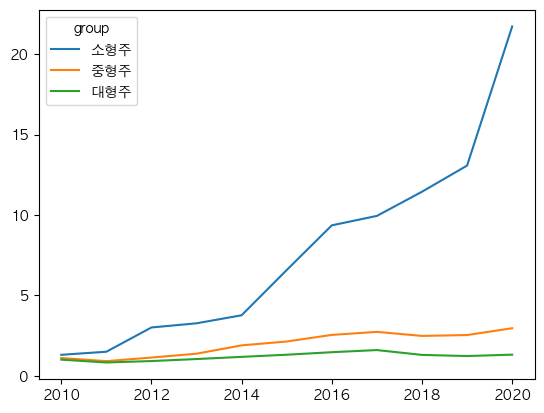

In [21]:
df.cumprod(axis=1).transpose().plot.line()